# Test two final models (Best and Proposed)

### Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, utils
from tensorflow import keras
from matplotlib import pyplot as plt

import sys
sys.path.insert(0, '../helpers/')
from plot_graphs import plot_loss, plot_acc

### Setting batch and image size, and importing the datasets 

In [4]:
IMAGE_SIZE = 100
BATCH_SIZE = 32

train = utils.image_dataset_from_directory("../datasets/data/split/Zenodo/train", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)
val = utils.image_dataset_from_directory("../datasets/data/split/Zenodo/val", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)
test = utils.image_dataset_from_directory("../datasets/data/split/Zenodo/test", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)

train = train.prefetch(buffer_size=tf.data.AUTOTUNE).cache()
val = val.prefetch(buffer_size=tf.data.AUTOTUNE).cache()
test = test.prefetch(buffer_size=tf.data.AUTOTUNE).cache()

Found 3840 files belonging to 6 classes.
Found 480 files belonging to 6 classes.
Found 480 files belonging to 6 classes.


### Processing images

In [5]:
def process_image(x):
  x = tf.image.adjust_brightness(x, 0.8)
  x = tf.image.adjust_contrast(x, 3)
  x = tf.image.adjust_saturation(x, 2)
  return x

def process_ds(dataset):
  return dataset.map(lambda x, y: (process_image(x), y)).prefetch(tf.data.AUTOTUNE).cache()
  
train_processed = process_ds(train)
val_processed = process_ds(val)
test_processed = process_ds(test)

## Best Model

In [ ]:
inputs = keras.Input(shape=(100, 100, 3))
x = inputs
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(6, activation='softmax')(x)

model_best = keras.Model(inputs, outputs)

model_best.compile(optimizer=keras.optimizers.RMSprop(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_best.summary()

In [ ]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=10
    ),    
    keras.callbacks.ModelCheckpoint(
        filepath="../models/4_best.h5",
        monitor="val_accuracy",
        save_best_only=True
    )
]

history_best = model_best.fit(
  train_processed,
  epochs=50,
  callbacks=callbacks_list,
  validation_data=val_processed
)

## Proposed

In [6]:
inputs = keras.Input(shape=(100, 100, 3))
x = inputs
x = layers.Conv2D(16, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(6, activation='softmax')(x)

model_proposed = keras.Model(inputs, outputs)

model_proposed.compile(optimizer=keras.optimizers.RMSprop(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_proposed.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 32)        9248  

In [7]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=10
    ),    
    keras.callbacks.ModelCheckpoint(
        filepath="../models/4_proposed.h5",
        monitor="val_accuracy",
        save_best_only=True
    )
]

history_proposed = model_proposed.fit(
  train,
  epochs=50,
  callbacks=callbacks_list,
  validation_data=val
)

Epoch 1/50


2022-08-29 06:21:20.833713: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-29 06:21:20.833805: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


119/120 [============================>.] - ETA: 0s - loss: 2.2958 - accuracy: 0.2348

2022-08-29 06:21:24.866021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


120/120 [==============================] - 5s 30ms/step - loss: 2.2900 - accuracy: 0.2349 - val_loss: 1.5958 - val_accuracy: 0.4021
Epoch 2/50
120/120 [==============================] - 3s 24ms/step - loss: 1.6845 - accuracy: 0.3477 - val_loss: 1.3505 - val_accuracy: 0.4688
Epoch 3/50
120/120 [==============================] - 3s 24ms/step - loss: 1.3683 - accuracy: 0.4836 - val_loss: 1.0712 - val_accuracy: 0.6708
Epoch 4/50
120/120 [==============================] - 3s 24ms/step - loss: 1.1217 - accuracy: 0.5891 - val_loss: 0.8551 - val_accuracy: 0.6813
Epoch 5/50
120/120 [==============================] - 3s 24ms/step - loss: 0.9838 - accuracy: 0.6435 - val_loss: 0.9414 - val_accuracy: 0.6646
Epoch 6/50
120/120 [==============================] - 3s 24ms/step - loss: 0.8184 - accuracy: 0.7047 - val_loss: 0.7346 - val_accuracy: 0.6875
Epoch 7/50
120/120 [==============================] - 3s 24ms/step - loss: 0.7186 - accuracy: 0.7354 - val_loss: 1.1222 - val_accuracy: 0.6604
Epoch 8/50

[[80  0  0  0  0  0]
 [ 0 78  0  0  1  1]
 [ 0  0 65  0  1 14]
 [ 0  5  0 70  3  2]
 [ 0  5  0  0 75  0]
 [ 1  1  2  2  1 73]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        80
           1       0.88      0.97      0.92        80
           2       0.97      0.81      0.88        80
           3       0.97      0.88      0.92        80
           4       0.93      0.94      0.93        80
           5       0.81      0.91      0.86        80

    accuracy                           0.92       480
   macro avg       0.92      0.92      0.92       480
weighted avg       0.92      0.92      0.92       480



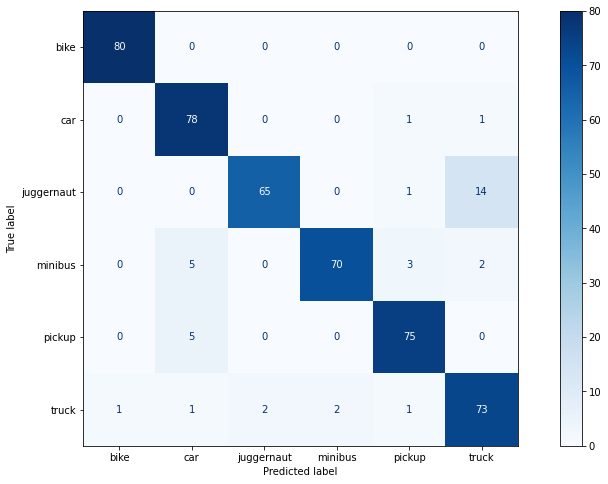

In [28]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

preds = np.argmax(model_proposed.predict(test), axis=1)
labels = []
for image, label in test.unbatch():
  labels.append(label)
labels = np.array(labels)
class_list = ['bike', 'car', 'juggernaut', 'minibus', 'pickup', 'truck']
cm = confusion_matrix(labels, preds)

print(cm)
print(classification_report(labels, preds))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_list)

plt.rcParams["figure.figsize"] = (15,8)

disp.plot(cmap=plt.cm.Blues)
plt.show()